# Question 1.2 Hourly Plot

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

For missing data, a red point will shown on line and use the last readinf data for ploting.
For decreasing data, a green point will shown on line.

In [9]:
def hourly_plot(N,ID,file,info=True):   # for plot certain month hourly plot, default missing information is not print out.
    for Id in ID:
        data = hour_info(N,Id,file)
        
        if data == None:
            print("There is no such dataid",Id)
            continue
            
        x = []
        y = []
        miss = []
        decre = []
        hold_m = 0
        M = ['Oct.2015', 'Nov.2015', 'Dec.2015', 'Jan.2016', 'Feb.2016', 'Mar.2016']
        
        for i in range(0,len(data)):
            x.append(i)
            if data[i] != -1:
                y.append(data[i])
                if data[i] < hold_m:
                    decre.append([i,hold_m])
                hold_m = data[i]
            else :
                y.append(hold_m)
                miss.append([i,hold_m])
        plt.plot(x,y,label=str(Id))
        plt.legend(loc='best')
        
        if info == True:#plot the missing point
            for i in miss:
                h = i[0]%24
                d = i[0]//24 + 1
                print("Data for house",  Id, "is MISSING on",M[N],"in day",d,"time",h)
                plt.scatter(i[0],i[1],color='r')
            
            for i in decre:
                h = i[0]%24
                d = i[0]//24 + 1
                print("Data for house",  Id, "is DECREASING on",M[N],"in day",d,"time",h)
                plt.scatter(i[0],i[1],color='g')
        
    plt.xticks()
    plt.xlabel('Number of hours from 1.'+M[N])
    plt.ylabel('Gas meter')
    plt.show()

The function hour_info is used to process data refer to hour information. Here we filter the file data by month and ID first.
The output data frame is {number of hour:ave_meter_value}.
If there no readings for certain hour, a -1 will be in the data.



In [10]:
def hour_info(N,ID,file):
    file = pd.read_csv(file)
    mon = [10,11,12,1,2,3]
    data = {}
    
    #generate hour number for certain month first
    if N == 0 or N == 2 or N == 3 or N == 5:
        hour_num = 31*24
    elif N == 4:
        hour_num = 29*24
    else:
        hour_num = 30*24
    for i in range(0,hour_num):
        data[i]= []
    
    #filter file by dataid 
    file = file[(file['dataid']==ID) | (file['dataid']==str(ID))]
    if len(file) == 0:
        return None
    #filter file by month
    file = file.values
    for i in range(0,len(file)):
        if int(file[i][0].split('-')[1]) == mon[N]:
            d = int(file[i][0].split('-')[2].split(' ')[0])
            h = int(file[i][0].split('-')[2].split(' ')[1].split(':')[0])
            h_num = (d-1)*24 + h
            data[h_num].append(file[i][2])
    for i in range(0,hour_num):
        if len(data[i]) != 0:
            data[i] = sum(data[i])/ len(data[i])
        else: 
            data[i] = -1

    return data

Data for house 5810 is MISSING on Oct.2015 in day 26 time 0
Data for house 5810 is MISSING on Oct.2015 in day 26 time 1
Data for house 5810 is MISSING on Oct.2015 in day 26 time 2
Data for house 5810 is MISSING on Oct.2015 in day 26 time 3
Data for house 5810 is MISSING on Oct.2015 in day 26 time 4
Data for house 5810 is MISSING on Oct.2015 in day 26 time 5
Data for house 5810 is MISSING on Oct.2015 in day 26 time 6
Data for house 5810 is MISSING on Oct.2015 in day 26 time 7
Data for house 5810 is MISSING on Oct.2015 in day 26 time 8
Data for house 5810 is MISSING on Oct.2015 in day 26 time 9
Data for house 5810 is MISSING on Oct.2015 in day 26 time 10
Data for house 5810 is MISSING on Oct.2015 in day 26 time 11
Data for house 5810 is MISSING on Oct.2015 in day 26 time 12
Data for house 5810 is MISSING on Oct.2015 in day 26 time 13
Data for house 5810 is MISSING on Oct.2015 in day 26 time 14
Data for house 5810 is MISSING on Oct.2015 in day 26 time 15
Data for house 5810 is MISSING on 

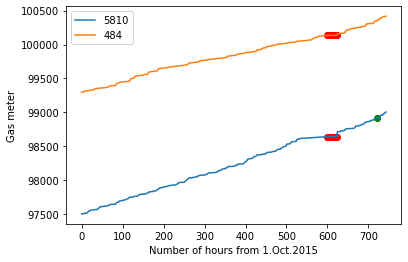

In [14]:
hourly_plot(0,[5810,484],'dataport-export_gas_oct2015-mar2016.csv')